In [40]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []

        self.graph[u].append(v)
        self.graph[v].append(u)

    def visualize(self):
        G = nx.Graph()
        for vertex in self.graph:
            for neighbor in self.graph[vertex]:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=16, font_weight='bold')
        plt.show()

    def get_vertex(self):
        return list(self.graph.keys())
    
    def get_num_nodes(self):
        return len(self.graph)
    
    def matrix(self):
        v = self.get_vertex()
        n = self.get_num_nodes()
        mat = np.zeros((n,n))

        for i in range(0,n):
            for j in range(0,n):
                if v[j] in self.graph[v[i]]:
                    mat[i][j] = 1
        
        return mat

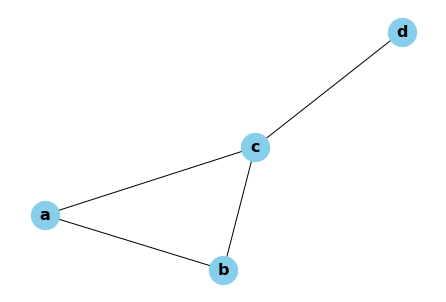

['a', 'b', 'c', 'd']
[[0. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 1. 0.]]


In [41]:
g = Graph()
g.add_edge('a','b')
g.add_edge('a','c')
g.add_edge('b','c')
g.add_edge('c','d')
g.visualize()
print(g.get_vertex())
print(g.matrix())

In [42]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
class DiGraph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []

        self.graph[u].append(v)

    def visualize(self):
        G = nx.DiGraph()
        for vertex in self.graph:
            for neighbor in self.graph[vertex]:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue',\
                 arrowsize = 20 ,font_size=16, font_weight='bold')
        plt.show()

    def get_vertex(self):
        return list(self.graph.keys())
    
    def get_num_nodes(self):
        return len(self.graph)
    
    def matrix(self):
        v = self.get_vertex()
        n = self.get_num_nodes()
        mat = np.zeros((n,n))

        for i in range(0,n):
            for j in range(0,n):
                if v[j] in self.graph[v[i]]:
                    mat[i][j] = 1
        
        return mat

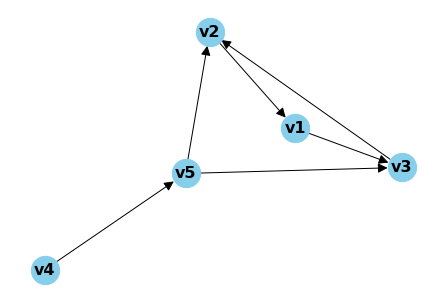

['v1', 'v3', 'v2', 'v4', 'v5']
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]]


In [43]:
dg = DiGraph()
dg.add_edge('v1','v3')
dg.add_edge('v1','v3')
dg.add_edge('v2','v1')
dg.add_edge('v3','v2')
dg.add_edge('v4','v5')
dg.add_edge('v5','v2')
dg.add_edge('v5','v3')
dg.visualize()
print(dg.get_vertex())
print(dg.matrix())

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
class WeightedGraph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v, weight):
        if u not in self.graph:
            self.graph[u] = {}
        if v not in self.graph:
            self.graph[v] = {}

        self.graph[u][v] = weight
        self.graph[v][u] = weight
    
    def visualize(self):
        G = nx.Graph()
        for vertex in self.graph:
            for neighbor, weight in self.graph[vertex].items():
                G.add_edge(vertex, neighbor, weight=weight)

        pos = nx.spring_layout(G)
        
        nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=16, font_weight='bold')
        edge_labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=16)
        plt.show()

    def get_vertex(self):
        return list(self.graph.keys())
    
    def get_num_nodes(self):
        return len(self.graph)

    def matrix(self):
        v = self.get_vertex()
        n = self.get_num_nodes()
        mat = np.zeros((n,n))
        
        for i in range(0,n):
            for j in range(0,n):
                if self.graph[v[i]].get(v[j]) is not None:
                    mat[i][j] = self.graph[v[i]][v[j]]
        
        return mat

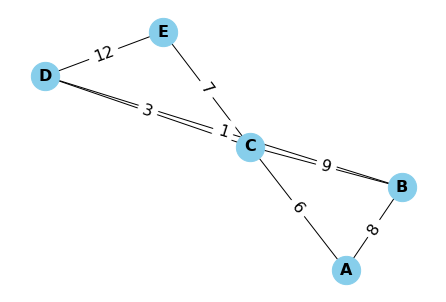

['A', 'B', 'C', 'D', 'E']
[[ 0.  8.  6.  0.  0.]
 [ 8.  0.  9.  1.  0.]
 [ 6.  9.  0.  3.  7.]
 [ 0.  1.  3.  0. 12.]
 [ 0.  0.  7. 12.  0.]]


In [45]:
wg = WeightedGraph()
wg.add_edge('A','B',8)
wg.add_edge('A','C',6)
wg.add_edge('B','C',9)
wg.add_edge('B','D',1)
wg.add_edge('C','D',3)
wg.add_edge('C','E',7)
wg.add_edge('D','E',12)
wg.visualize()
print(wg.get_vertex())
print(wg.matrix())

In [46]:
from collections import deque
def breath_first_traversal(g, v):
    visited = []
    q = deque()
    q.append(v)
    while len(q) != 0:
        w = q.popleft()
        visited.append(w)
        print(w, end = ' ')
        for u in g.graph[w]:
            if u not in visited:
                q.append(u)
                visited.append(u)

In [47]:
from collections import deque
def depth_first_traversal(g,v):
    visited = []
    s = deque()
    s.append(v)
    while len(s) != 0:
        u = s.pop()
        if u not in visited:
            print(u, end=' ')
            visited.append(u)
            # temp_ls = []
            for w in g.graph[u]:
                s.append(w)
            #     temp_ls.insert(0,w)
            # s.extend(temp_ls)

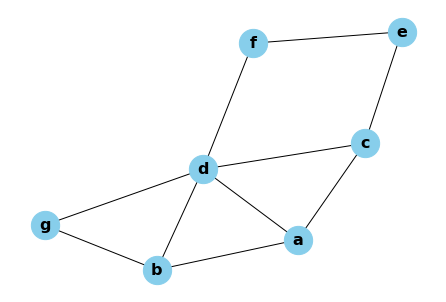

a b c d g e f 

a d g b f e c 

In [48]:
g = Graph()
g.add_edge('a','b')
g.add_edge('a','c')
g.add_edge('a','d')
g.add_edge('b','d')
g.add_edge('b','g')
g.add_edge('c','d')
g.add_edge('c','e')
g.add_edge('d','f')
g.add_edge('d','g')
g.add_edge('e','f')
g.visualize()
breath_first_traversal(g,'a')
print('\n')
depth_first_traversal(g,'a')

In [49]:
import numpy as np
def prim(wg,v):
    visited = []
    non_visited = wg.get_vertex()
    selected_edges = []
    
    visited.append(v)
    non_visited.remove(v)

    acc_weight = 0

    while non_visited :
        min_weight = np.inf
        for u in visited:
            for w in non_visited:
                if wg.graph[u].get(w) is not None:
                    if wg.graph[u][w] < min_weight:
                        min_weight = wg.graph[u][w]
                        selected_vertex = w
                        selected_edge = [u,w,min_weight]
        visited.append(selected_vertex)
        non_visited.remove(selected_vertex)
        selected_edges.append(selected_edge)
        
        acc_weight = acc_weight + selected_edge[2]

    print(selected_edges)
    print('Minimum sum of weight : '+str(acc_weight))

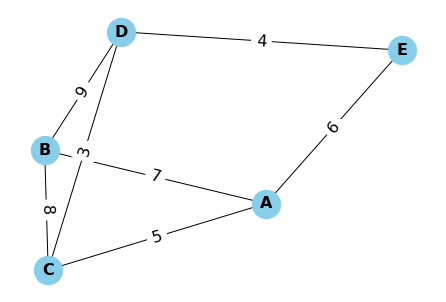

[['A', 'C', 5], ['C', 'D', 3], ['D', 'E', 4], ['A', 'B', 7]]
Minimum sum of weight : 19
[['B', 'A', 7], ['A', 'C', 5], ['C', 'D', 3], ['D', 'E', 4]]
Minimum sum of weight : 19
[['C', 'D', 3], ['D', 'E', 4], ['C', 'A', 5], ['A', 'B', 7]]
Minimum sum of weight : 19
[['D', 'C', 3], ['D', 'E', 4], ['C', 'A', 5], ['A', 'B', 7]]
Minimum sum of weight : 19
[['E', 'D', 4], ['D', 'C', 3], ['C', 'A', 5], ['A', 'B', 7]]
Minimum sum of weight : 19


In [50]:
wg = WeightedGraph()
wg.add_edge('A','B',7)
wg.add_edge('A','C',5)
wg.add_edge('A','E',6)
wg.add_edge('B','C',8)
wg.add_edge('B','D',9)
wg.add_edge('C','D',3)
wg.add_edge('D','E',4)
wg.visualize()
prim(wg,'A')
prim(wg,'B')
prim(wg,'C')
prim(wg,'D')
prim(wg,'E')

In [56]:
import numpy as np
def dijkstra(wg,u):
    visited = []
    non_visited = wg.get_vertex()
    
    visited.append(u)
    non_visited.remove(u)

    tracking = {}
    for w in wg.get_vertex():
        tracking[w] = [u,np.inf]
    tracking[u][1] = 0

    while non_visited :
        for p in visited:
            for q in non_visited:
                if wg.graph[p].get(q) is not None:
                    if tracking[p][1]+wg.graph[p][q] < tracking[q][1]:
                        tracking[q][0] = p
                        tracking[q][1] = tracking[p][1]+wg.graph[p][q]
            
            min_dist = np.inf
            for q in non_visited:
                if tracking[q][1] < min_dist:
                    min_dist = tracking[q][1]
                    selected_vertex = q

        visited.append(selected_vertex)
        non_visited.remove(selected_vertex)
    return tracking

def min_path_dist(wg,u,v):
    tracking = dijkstra(wg,u)
    min_dist = tracking[v][1]

    curr = v
    ls = []
    while curr != u :
        ls.append(curr)
        curr = tracking[curr][0]
    ls.append(u)

    ls.reverse()
    
    n = len(ls)
    for i in range(0,n-1):
        print(ls[i], end=' -> ')
    print(ls[n-1])

    print('Minimum Distance from '+u+' to '+v+' -> ', end='')
    for i in range(1,n-1):
        print(str(wg.graph[ls[i]][ls[i-1]]), end='+')
    print(str(wg.graph[ls[n-1]][ls[n-2]])+' = '+str(min_dist))


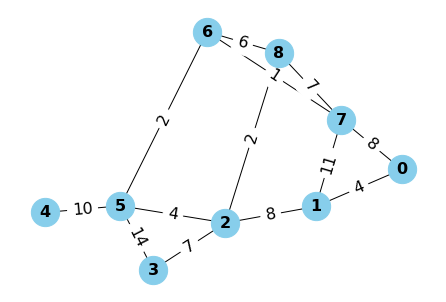

0 -> 7 -> 6 -> 5 -> 4
Minimum Distance from 0 to 4 -> 8+1+2+10 = 21


In [57]:
wg = WeightedGraph()
wg.add_edge('0','1',4)
wg.add_edge('0','7',8)
wg.add_edge('1','2',8)
wg.add_edge('1','7',11)
wg.add_edge('2','3',7)
wg.add_edge('2','5',4)
wg.add_edge('2','8',2)
wg.add_edge('3','5',14)
wg.add_edge('4','5',10)
wg.add_edge('5','6',2)
wg.add_edge('6','7',1)
wg.add_edge('6','8',6)
wg.add_edge('7','8',7)
wg.visualize()
min_path_dist(wg,'0','4')